# CS 210 Project Progress Report: NYC Airbnb Data Analysis

Group ID: 15

Members:
- Aleyna Beste Özhan 24921
- Mert Kurttutan 23882

Main Dataset: 
- NYC Airbnb Open Data

Supplementary Datasets: 
- New York City University and College Data 
- New York City Restaurant Inspection Results
- New York City Theater Data 
- New York City Bike Routes Data 
- New York City Wi-Fi Hotspot Locations
- New York City Subway Stations
- New York City Neighborhood Map

In this project, we will ask questions to extract insights from data. We will process, explore, visualize and analyze the data with the help of tools that we have learned in the class. 
After the analysis, our next step is to use these datasets for better understand the dynamics of Airbnb rents. Our aim is to find out the features that make an Airbnb place popular. We will analyze the Airbnb data (after cleaning and exploration), along with the other datasets to see the correlations and relations among them, using correlation matrix, map visualization etc. Our next step will be implementing the ML models for making predictions and clasifications. The details of the ML models will be given down in the notebook. For a possible client or a host, our model will make a recommendation of neighborhood given desired properties such as price, availability. Also, we will build a model to predict price given other properties such as location, minimum nights, neighborhood. This price prediction will be beneficial for a client and for a host as well, when it comes to business plan. Another prediction is made for room type.


## Data Pre-Processing
In this section, we will read and try to understand the form of our dataset. Our first task is to know more about data. We are going to read the data, display the head to see what is inside, and show the shape and data types of columns. We will deal with NaN values, and get rid of unnecessary columns if needed. 

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
pip install geopandas


     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 15.9MB/s 
     |████████████████████████████████| 14.7MB 305kB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy import stats
import seaborn as sns
import folium
import urllib
import geopandas as gpd

sns.set_style("darkgrid")          # For better visuals

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"))
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [0]:
df.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [0]:
df.shape

(48895, 16)

### Dealing With NaN and Unnecessary Values

Next, we detect the NaN values in our data and fix them.

In [0]:
df.isna().sum() / df.shape[0] * 100.00

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

Since id, and host_name are not relevant for our purposes, we drop them and simplify our data.

In [0]:
df.drop(['id','host_name'], axis=1, inplace=True)
df.describe()

host_id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   6.762001e+07  ...        112.781327
std    7.861097e+07  ...        131.622289
min    2.438000e+03  ...          0.000000
25%    7.822033e+06  ...          0.000000
50%    3.079382e+07  ...         45.000000
75%    1.074344e+08  ...        227.000000
max    2.743213e+08  ...        365.000000

[8 rows x 9 columns]

## Extracting Insights 
This is where we are going to display charts, histograms, try to find correlations and dependence between features. We will manipulate the data to fit our needs.

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe346955c0>,
      dtype=object)

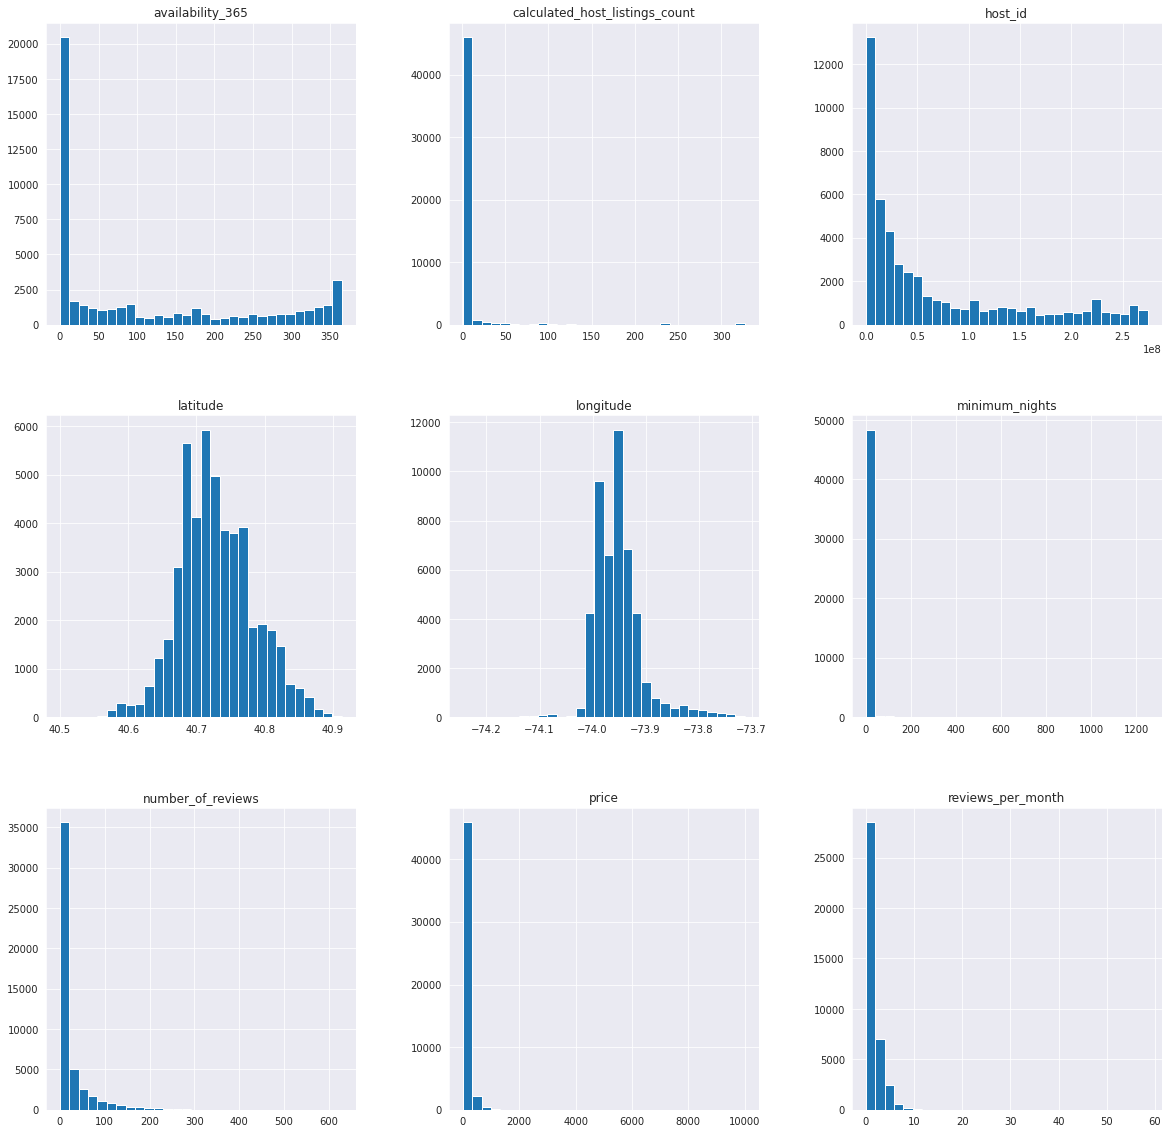

In [0]:
df.hist(bins=30,  figsize=(20,20))

#note that each x axis and y axis represents the quantity for the feature and the frequency of it, respectively

We observed the following properties for each distribution.

Availability: It is almost evenly distributed except for the huge peak around 0-50 interval.

Host listing: Around 0, there is a peak. We see a few outliers around 250, 300. This can be seen from the describe table where standard deviation is $\sigma \approx 32$ despite the peak huge.

Number of Reviews: It is a right-skewed distribution as we see increase toward less number of reviews.

Reviews per Month: It is a right-skewed distribution as we see increase toward less number of reviews per month.

Minimum Night: It is highly localized around 0.

Price: It is a right-skewed distribution and localized around 0. The existence of outliers can be seen from the describe table where standard deviation is $\sigma \approx 240$ despite the peak huge.

Latitude: It is localized around $(40.7,40.8)$ interval smoothly. 
  
Longitude: It is localized around $(-74.0, -73.9)$ interval smoothly.

### Dealing with Outliers
As we can see, there is a problem of outliers for the price and minimum night. To better see, let's plot box plots

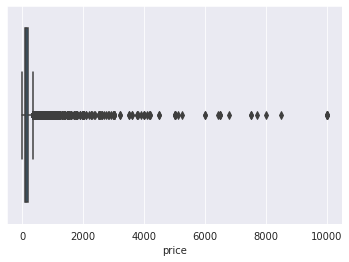

In [0]:
import seaborn as sns
sns.boxplot(df['price'])

As a solution, we will fill the price datas that are greater than the 4000 with the mean value. Since we do not drop the outliers, we prevent the possible data loss.

In [0]:
mean=df["price"].mean() 
for k in df.index:
  if df["price"][k]>1000:
   df["price"][k]=mean
df.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


host_id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   6.762001e+07  ...        112.781327
std    7.861097e+07  ...        131.622289
min    2.438000e+03  ...          0.000000
25%    7.822033e+06  ...          0.000000
50%    3.079382e+07  ...         45.000000
75%    1.074344e+08  ...        227.000000
max    2.743213e+08  ...        365.000000

[8 rows x 9 columns]

The same process applies for the minimum night:

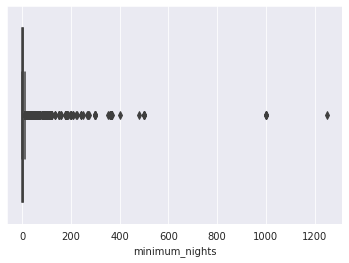

In [0]:
import seaborn as sns
sns.boxplot(df['minimum_nights'])

In [0]:
mean=df["minimum_nights"].mean()
for k in df.index:
  if df["minimum_nights"][k]>250:
    df["minimum_nights"][k]=mean
df.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


host_id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   6.762001e+07  ...        112.781327
std    7.861097e+07  ...        131.622289
min    2.438000e+03  ...          0.000000
25%    7.822033e+06  ...          0.000000
50%    3.079382e+07  ...         45.000000
75%    1.074344e+08  ...        227.000000
max    2.743213e+08  ...        365.000000

[8 rows x 9 columns]

###Neighborhood Group Distribution

Now that we have the appropriate form for the data, we can start investigation by looking at the number of Airbnb houses rent at each neighbourhood. This is significant in terms of the demand for house. As we see, the most popular neighbourhood is Manhattan, however there is also a great demand for Brooklyn, as well. Now we will check the other features to find out why they are so popular, compared to others.

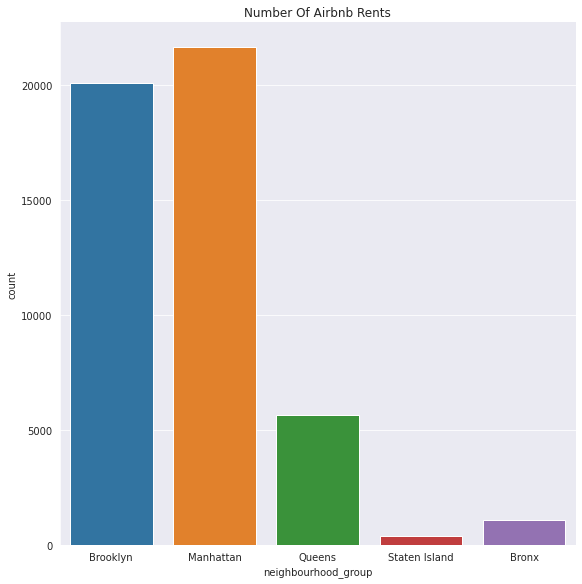

In [0]:
sns.catplot("neighbourhood_group", data=df, kind="count", height=8).set(title="Number Of Airbnb Rents")

We also need to see the distribution among neigbourhoods. Interestingly, although the most popular neighbourhood group is Manhattan; the 4 most popular neighbourhood are Brooklyn neighbourhoods.  

Text(0, 0.5, 'Neighbourhood')

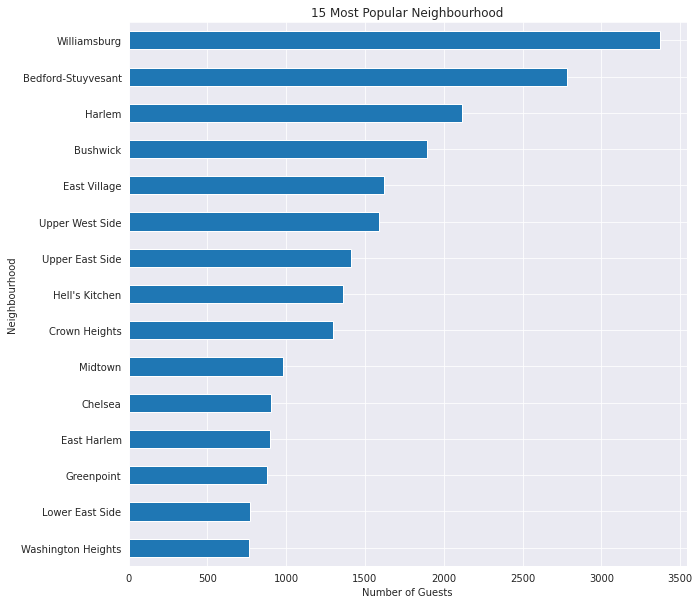

In [0]:
fig, axes = plt.subplots(1,1, figsize=(10,10))


(df.groupby('neighbourhood')['host_id'].nunique()).sort_values(ascending=True)[-15:].plot(kind='barh', title= "15 Most Popular Neighbourhood", )
axes.set_xlabel("Number of Guests")
axes.set_ylabel("Neighbourhood")

### Price Distribution
Another important aspect that we're interested in is price since it is conceivable that the majority of the people would choose houses of lower price. We can see that the Queens, Staten Island, and Bronx have price distributions localized around lower prices, as compared to others. Manhattan has more houses in high price regime. Brooklyn has lower price average than Manhattan, but higher than the others. This result is interesting because although Manhattan has the higher prices, it is the most popular place. This makes us think that there are other important dynamics influencing the people's decisions. 

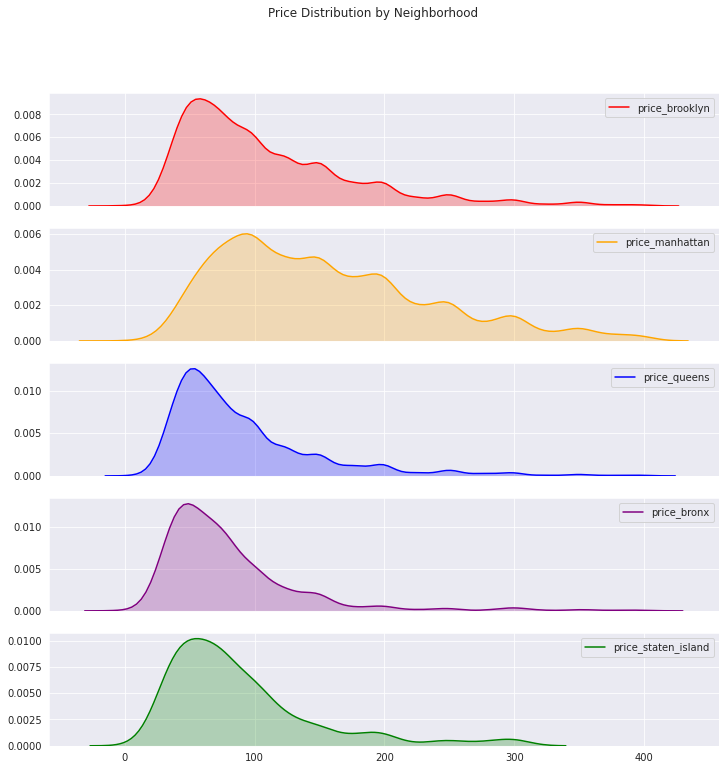

In [0]:
UpperLim = 400                   #This upper limit is appropriate for visualization purpose
                                 #as there are almost vanishing number of houses after 400-500

price_brooklyn = df[(df["neighbourhood_group"] == "Brooklyn") & (df["price"] < UpperLim )]["price"]
price_manhattan = df[(df["neighbourhood_group"] == "Manhattan") & (df["price"] < UpperLim)]["price"]
price_queens = df[(df["neighbourhood_group"] == "Queens") & (df["price"] < UpperLim)]["price"]
price_bronx = df[(df["neighbourhood_group"] == "Bronx") & (df["price"] < UpperLim)]["price"]
price_staten_island = df[(df["neighbourhood_group"] == "Staten Island") & (df["price"] < UpperLim)]["price"]
fig, ax = plt.subplots(5,1, figsize=(12,12), sharex = True)
fig.suptitle("Price Distribution by Neighborhood")

sns.kdeplot(price_brooklyn, shade=True,  ax=ax[0], label="price_brooklyn", color="red")
sns.kdeplot(price_manhattan, shade=True, ax=ax[1], label="price_manhattan", color="orange")
sns.kdeplot(price_queens, shade=True, ax=ax[2], label="price_queens", color="blue")
sns.kdeplot(price_bronx, shade=True, ax=ax[3], label="price_bronx", color="purple")
sns.kdeplot(price_staten_island, shade=True, ax=ax[4], label="price_staten_island", color="green")

plt.show()

Here is the mean price for each neighbourhood group

In [0]:
print(price_brooklyn.mean(),price_manhattan.mean(),price_queens.mean(),price_bronx.mean(),price_staten_island.mean())

108.83075671277462 153.56080680245205 90.69164882226981 79.25626740947075 89.40710382513662


### Room-Type Distributions
We are also interested in room type and price distributions because it is important to know which kind of house is popular in the interested region. Here, we see that entire home is the most expensive type, following by private room. Entire home prices are very high in Manhattan, compared to others.

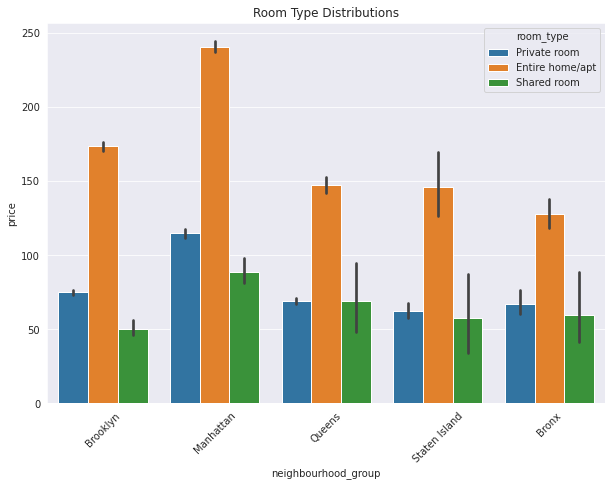

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.title("Room Type Distributions")
plt.show()

Here, we also see that entire home is the most poular choice for Manhattan, although it is the most expensive one.
In Brooklyn, Queens, Bronx and Staten Island private room is the most popular one. 

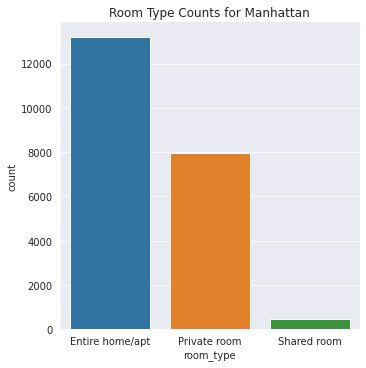

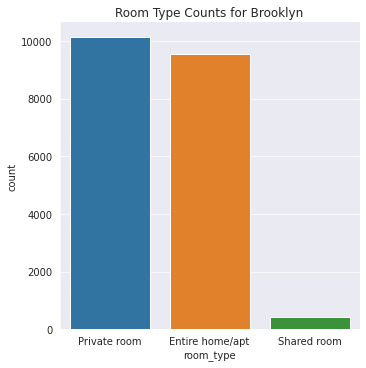

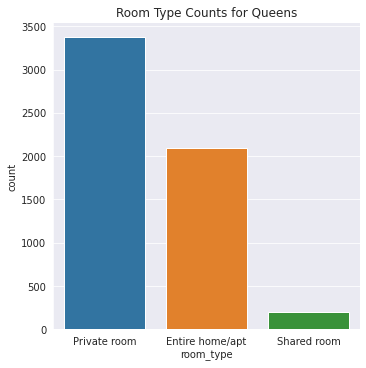

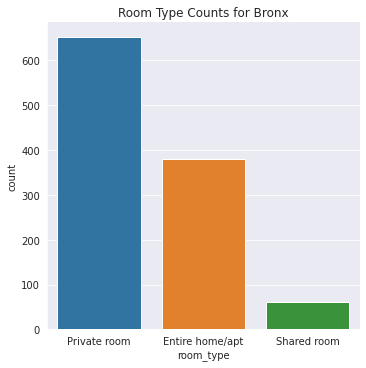

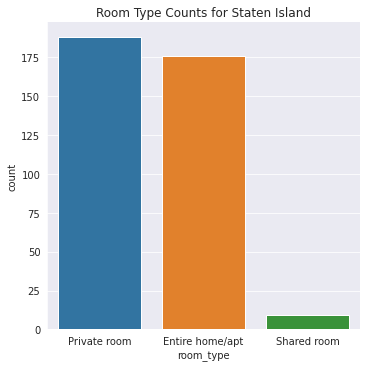

In [0]:

sns.catplot("room_type", data=df[df["neighbourhood_group"]=='Manhattan'], kind="count", height=5).set(title="Room Type Counts for Manhattan")
sns.catplot("room_type", data=df[df["neighbourhood_group"]=='Brooklyn'], kind="count", height=5).set(title="Room Type Counts for Brooklyn")
sns.catplot("room_type", data=df[df["neighbourhood_group"]=='Queens'], kind="count", height=5).set(title="Room Type Counts for Queens")
sns.catplot("room_type", data=df[df["neighbourhood_group"]=='Bronx'], kind="count", height=5).set(title="Room Type Counts for Bronx")
sns.catplot("room_type", data=df[df["neighbourhood_group"]=='Staten Island'], kind="count", height=5).set(title="Room Type Counts for Staten Island")

### Review Distribution
Interestingly, although Manhattan and Brooklyn are the most popular neighbourhoods; the region with highest average review is Queens following by Staten Island and Bronx. The reason may be the high prices of Manhattan and Brooklyn. 

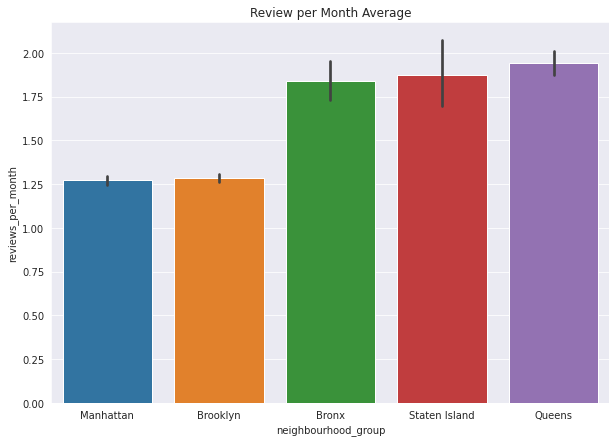

In [0]:
plt.figure(figsize=(10,7))
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.mean).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group'])
plt.title("Review per Month Average")
plt.show()

### Availability Distibution
We see that although Manhattan and Brooklyn are the most popular neighbourhoods, average availability of Airbnb places in Staten Island is higher. 

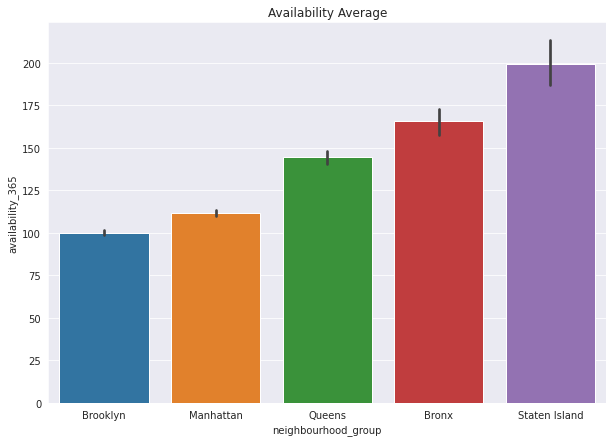

In [0]:
plt.figure(figsize=(10,7))
result = df.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.mean).reset_index().sort_values('availability_365')
sns.barplot(x='neighbourhood_group', y="availability_365", data=df, order=result['neighbourhood_group'])
plt.title("Availability Average")
plt.show()

### Minimum Nights Distribution
When we plot the mean minimum nights per neighbourhood we see that Manhattan has the largest, following by Brooklyn.

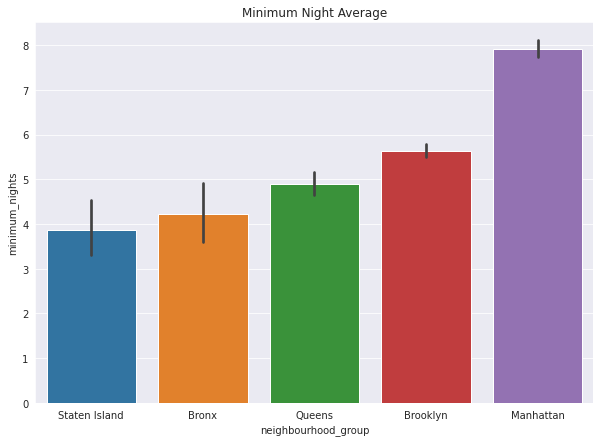

In [0]:
plt.figure(figsize=(10,7))
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.mean).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group'])
plt.title("Minimum Night Average")
plt.show()



### Most Frequent Words
It is nice to see the word cloud because the most used words will give an idea about advertising strategies.  

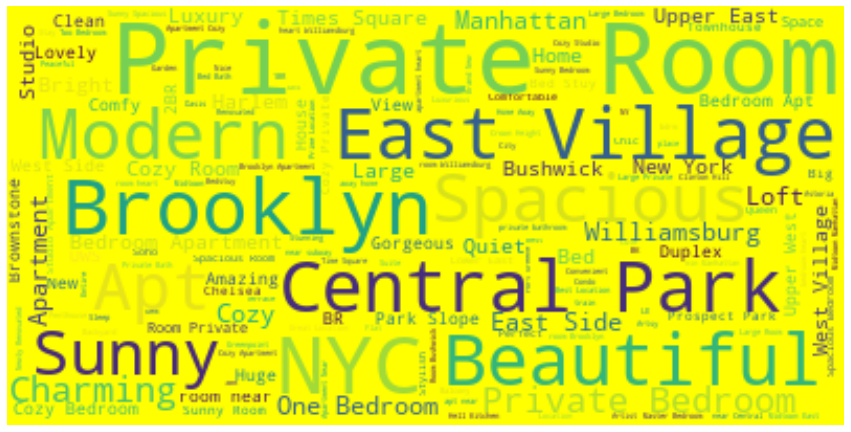

In [0]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Spatial Distributions
Now, we look at the heat distribution in New York City. Since the most popular region is Manhattan, it is the most heated region.

In [0]:
from folium.plugins import HeatMap
locations=[]
for i in df.index:
    a=df['latitude'][i]
    b=df['longitude'][i]
    locations.append((a,b))
m = folium.Map(location=locations[0],zoom_start=6, tiles="Stamen Terrain")

HeatMap(locations, radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
m

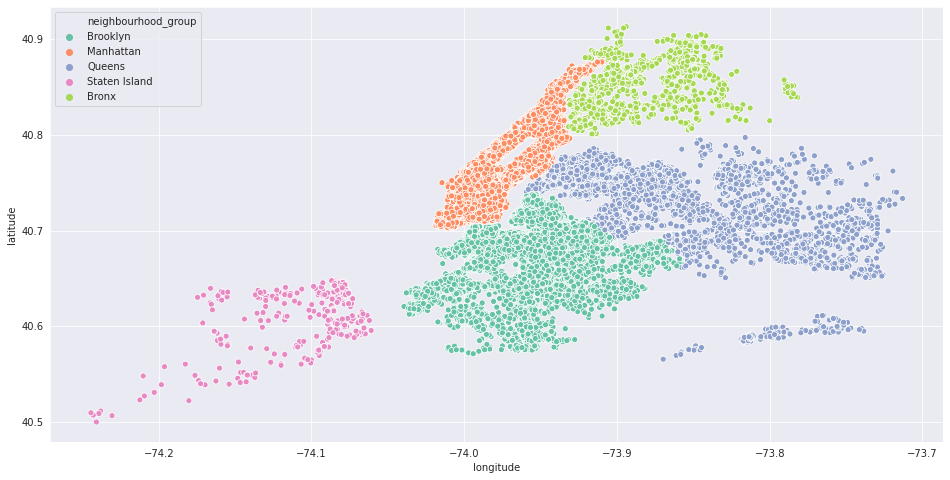

In [0]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="Set2")
plt.show()

### Correlation Matrix

To see possible statistical dependence, we obtained the correlation matrix between available features, for the entire New York City. But, there is no correlation as the correlation coefficients are low.

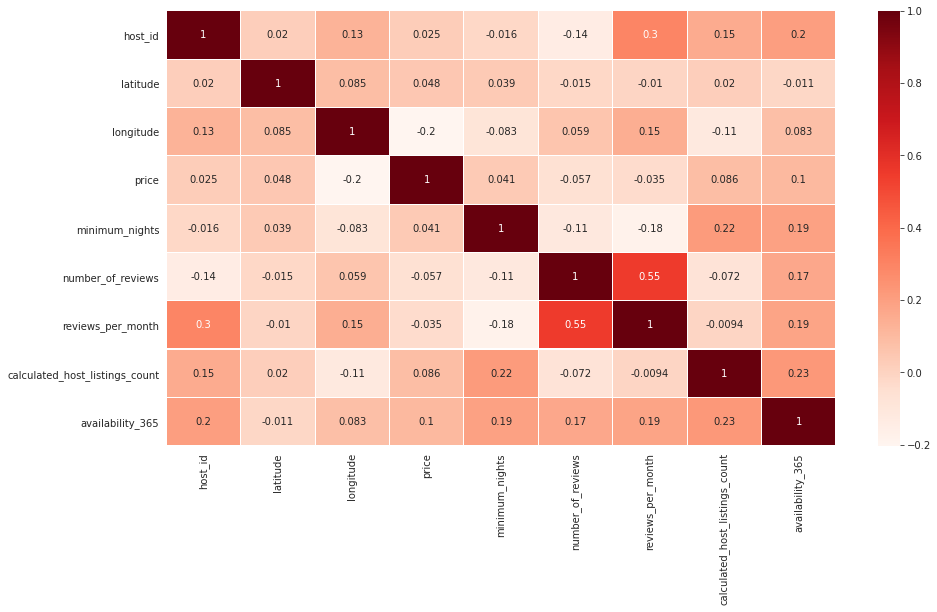

In [0]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, cmap='Reds')

## Supplementary Datasets
Here, we try to understand the correlations between Airbnb rents and the locations that attract masses and the features that a client may request such as wifi, bicycle route.

### NYC Theatre Data
For this part, our dataset do not require pre-processing since we will use only the location information. As we can see, majority of the theaters are in Manhattan. This will be an agent increasing popularity since theaters attract masses. 

In [0]:
NYC_TH = pd.read_csv(join(path_prefix, "DOITT_THEATER_01_13SEPT2010.csv"))

NYC_TH.head()


the_geom  ...    ZIP
0  POINT (-73.99061840882582 40.75985115447559)  ...  10036
1   POINT (-73.9881059525377 40.76047123447081)  ...  10036
2  POINT (-73.97038450260143 40.76339942774153)  ...  10022
3   POINT (-73.99332384622063 40.7585366821068)  ...  10036
4   POINT (-73.9892143340222 40.75926091219353)  ...  10036

[5 rows x 8 columns]

We will extract the latitude and longitude information from the first columns of the data by the code below.

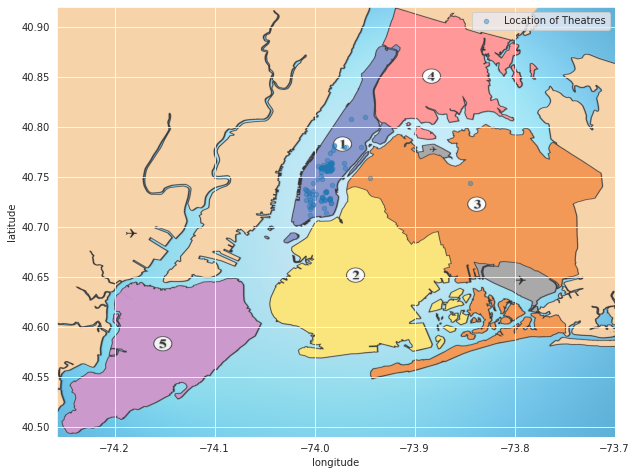

In [0]:
def lot(x):
  #function for obtaining longitude
  text = x["the_geom"]
  n = 1
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(' ')
  groups2[1] = groups2[1][:-1]
  groups2 = [float(i) for i in groups2] 
  return groups2[0]

def lat(x):
  #function for obtaining longitude
  text = x["the_geom"]
  n = 1
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(' ')
  groups2[1] = groups2[1][:-1]
  groups2 = [float(i) for i in groups2] 
  return groups2[1]

#adding the columns for latitude and longitude
NYC_TH["longitude"] = NYC_TH.apply(lot, axis=1)
NYC_TH["latitude"] = NYC_TH.apply(lat, axis=1)


data_plot1 = NYC_TH
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/a7/5_Boroughs_New_York_City_Ma.png')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
data_plot1.plot(kind='scatter', x='longitude', y='latitude',  ax=ax,  alpha=0.4, zorder=5, legend=True)
ax.legend(["Location of Theatres"])
plt.show()

### NYC Universities and Colleges
The region where there are many schools may also be a reason for high Airbnb rents. Students, guest lecturers etc will stay. As we can see, Manhattan again has the majority of schools but Brooklyn also has a great amount of them also. 

In [0]:
UC = pd.read_csv(join(path_prefix, "COLLEGE_UNIVERSITY.csv"))
UC.head()

the_geom  ...           BBL
0   POINT (-73.99465215457163 40.73519616365903)  ...  1.005760e+09
1   POINT (-73.99706966379965 40.73546280987431)  ...  1.005750e+09
2  POINT (-74.00681944352681 40.723441859057495)  ...  1.002260e+09
3   POINT (-73.79439300079635 40.73944287003665)  ...  4.068890e+09
4  POINT (-73.84872054010768 40.721371886956774)  ...  4.032348e+09

[5 rows x 9 columns]

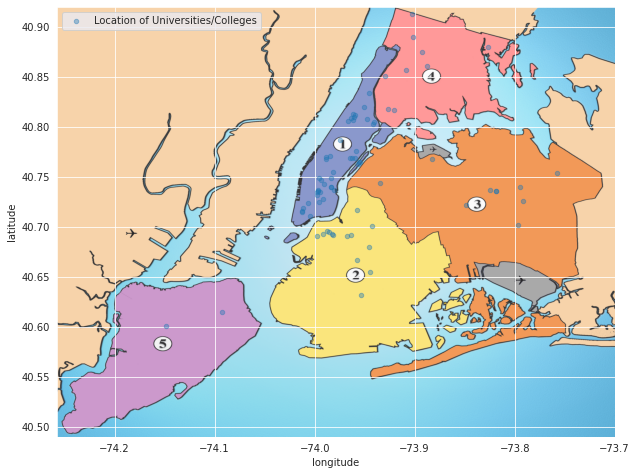

In [0]:
def lot(c):
  #function for obtaining longitude
  text = c["the_geom"]
  n = 1
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(' ')
  groups2[1] = groups2[1][:-1]
  groups2 = [float(i) for i in groups2] 
  return groups2[0]

def lat(c):
  #function for obtaining latitude
  text = c["the_geom"]
  n = 1
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(' ')
  groups2[1] = groups2[1][:-1]
  groups2 = [float(i) for i in groups2] 
  return groups2[1]


#adding the columns for latitude and longitude
UC["longitude"] = UC.apply(lot, axis=1)
UC["latitude"] = UC.apply(lat, axis=1)


data_plot2=UC
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/a7/5_Boroughs_New_York_City_Ma.png')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
data_plot2.plot(kind='scatter', x='longitude', y='latitude',  ax=ax,  alpha=0.4, zorder=5, legend=True)
ax.legend(["Location of Universities/Colleges"])
plt.show()

### NYC Restaurants
Being surrounded by places where you can buy food is an appealing feature for an Airbnb client. Hence, regions where there are lots of Restourants may be more popular. As we can see, Manhattan has lots of restaurants but there are also many other restaourant in other neighbourhoods. Hence, we can say that restaurant approximity is not a big issue for other locations rather than Manhattan. In the data we can also see the restourant ratings.

In [0]:
r= pd.read_csv(join(path_prefix, "DOHMH_New_York_City_Restaurant_Inspection_Results.csv"))
r.head()

CAMIS                    DBA       BORO  ...        BIN         BBL   NTA
0  50019198           NOODLE HOUSE     Queens  ...  4172803.0  4083360001  QN45
1  41329499                PEACHES   Brooklyn  ...  3047065.0  3016750001  BK61
2  50015826  ASTORIA PIZZA FACTORY     Queens  ...  4458169.0  4008260006  QN72
3  50069897  KENNEDY FRIED CHICKEN  Manhattan  ...  1060172.0  1020130038  MN03
4  41701282     NEW PEARL OF CHINA      Bronx  ...  2074438.0  2053860024  BX52

[5 rows x 26 columns]

In [0]:
r=r.dropna() #there are NaN values for location hence we drop them

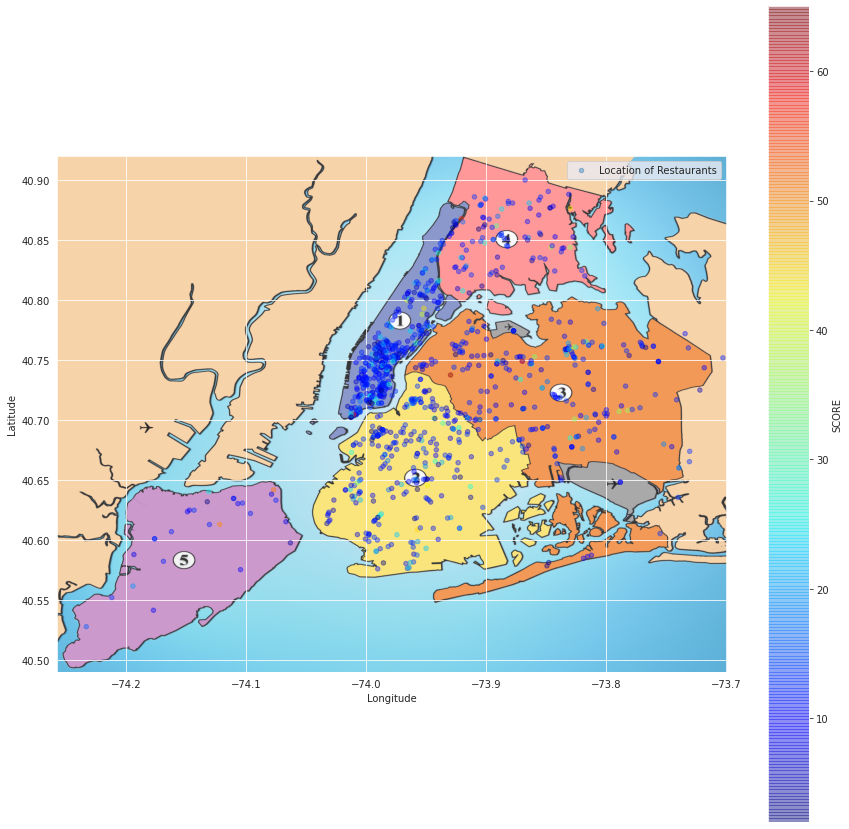

In [0]:
sub_6=r
plt.figure(figsize=(15,15))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/a7/5_Boroughs_New_York_City_Ma.png')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot again
sub_6.plot(kind='scatter', x='Longitude', y='Latitude', c='SCORE', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5, legend=True)

ax.legend(["Location of Restaurants"])
plt.show()

### NYC Free Wifi Locations
A client may prefer to stay in a place where he/she can find WiFi connection nearby. Hence might be a good feature for popularity. We see that the majority of the free sifi sports are in Manhattan, followed by Brooklyn. 

In [0]:
w = pd.read_csv(join(path_prefix, "NYC_Wi-Fi_Hotspot_Locations.csv"))

w

OBJECTID Borough  ... DOITT_ID                         Location (Lat, Long)
0          998      MN  ...     1425  New York\n(40.74596800000, -73.99403900000)
1          999      MN  ...     1426  New York\n(40.74461400000, -73.98506900000)
2         1000      MN  ...     1427  New York\n(40.75766600000, -73.98587800000)
3         1001      MN  ...     1428  New York\n(40.75997100000, -73.98434200000)
4         1002      MN  ...     1429  New York\n(40.76041300000, -73.98454100000)
...        ...     ...  ...      ...                                          ...
2561      2562      MN  ...     2115  New York\n(40.74877200000, -73.98867300000)
2562      2563      MN  ...     2116  New York\n(40.75008700000, -73.98778100000)
2563      2564      MN  ...     2117  New York\n(40.75495100000, -73.98389900000)
2564      2565      MN  ...     2118  New York\n(40.76246800000, -73.97473200000)
2565      2566      MN  ...     2119  New York\n(40.77544300000, -73.98236700000)

[2566 rows x 29 columns]

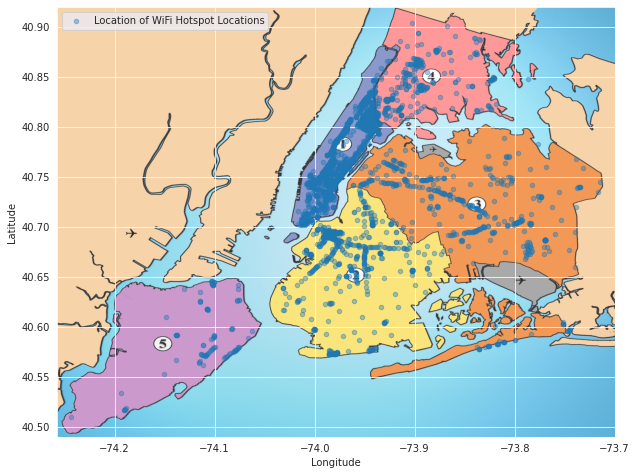

In [0]:
data_plot4 = w

#initializing the figure size
plt.figure(figsize=(10,8))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/a7/5_Boroughs_New_York_City_Ma.png')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot again
data_plot4.plot(kind='scatter', x='Longitude', y='Latitude',  ax=ax,  alpha=0.4, zorder=5, legend=True)
ax.legend(["Location of WiFi Hotspot Locations"])

plt.show()

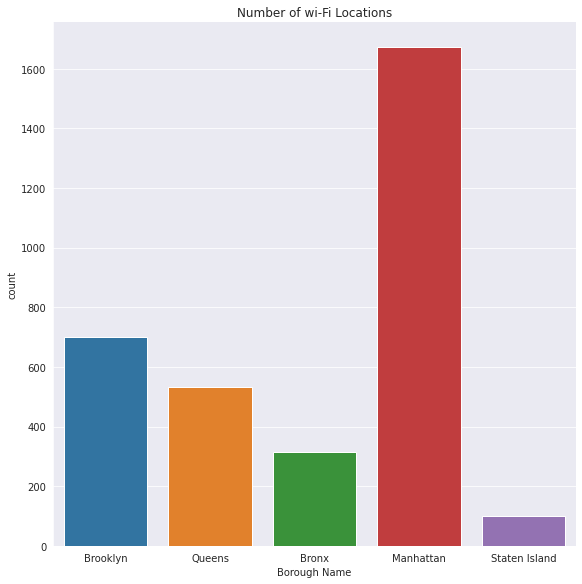

In [0]:
sns.catplot("Borough Name", data=w, kind="count", height=8).set(title="Number of wi-Fi Locations")

### NYC Bike Routes
In a city like New York where traffic is a big issue, many people may prefer to use bikes. Hence, being near to bike routes may be important for a client. Here we see that there is no drastic difference between Manhattan and Brooklyn.However in Brooklyn, the bike routes are concentrated in particular region.

In [0]:
b = pd.read_csv(join(path_prefix, "nyc_bike_routes_2017.csv"))
b.shape

(18730, 16)

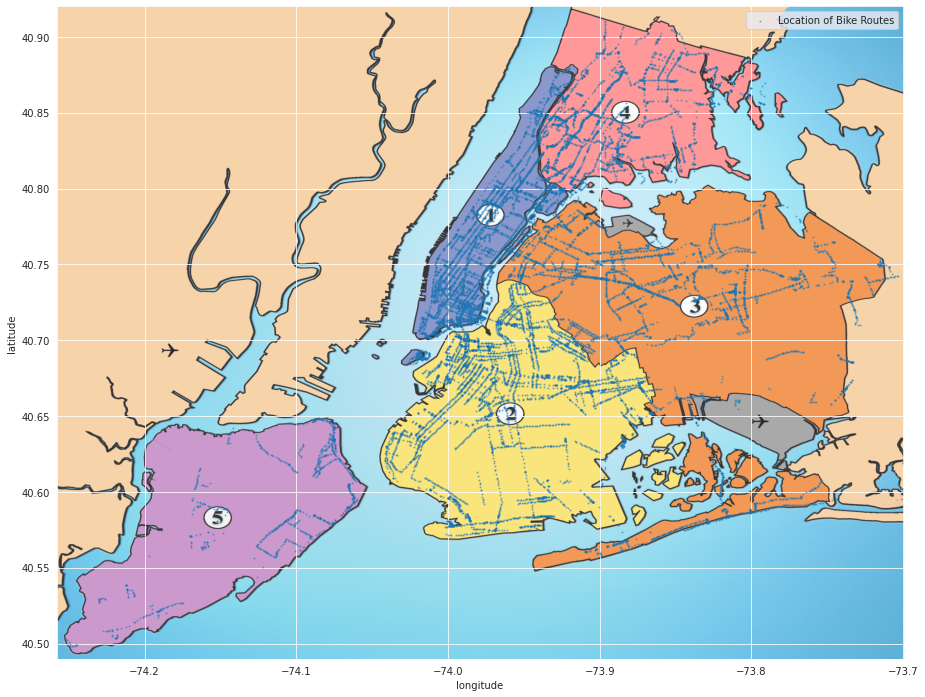

In [0]:
def lot(row):
  text = row["the_geom"]
  n = 2
  m=0                    #whether it is the first pair or the second pair
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(',')
  groups3 = groups2[0].split(' ')
  groups3 = [float(i) for i in groups3] 

  return groups3[0]

def lat(row):
  text = row["the_geom"]
  n = 2
  m=0                    #whether it is the first pair or the second pair
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(',')
  groups3 = groups2[0].split(' ')
  groups3 = [float(i) for i in groups3] 
  return groups3[1]



b["longitude"] = b.apply(lot, axis=1)
b["latitude"] = b.apply(lat, axis=1)

data_plot5 = b

#initializing the figure size
plt.figure(figsize=(20,12))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/a7/5_Boroughs_New_York_City_Ma.png')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot again
data_plot5.plot(kind='scatter', x='longitude', y='latitude',  ax=ax,  alpha=0.4, zorder=5, s=1.3, legend=True)
ax.legend(["Location of Bike Routes"])

plt.show()

### NYC Subway
Being closer to a subway station is also very important for a client since transportation is a significant part of life in New York. As we can see, there are neighbourhoods with no subway station in Queens, Brooklyn, Bronx. Manhattan is again, has the advantage of subway accesibility.

In [0]:
NYC_S = pd.read_csv(join(path_prefix, "DOITT_SUBWAY_STATION_01_13SEPT2010.csv"))

NYC_S.head(8)

URL  ...                                              NOTES
0  http://web.mta.info/nyct/service/  ...  4 nights, 6-all times, 6 Express-weekdays AM s...
1  http://web.mta.info/nyct/service/  ...  4 nights, 6-all times, 6 Express-weekdays AM s...
2  http://web.mta.info/nyct/service/  ...                              1-all times, 2-nights
3  http://web.mta.info/nyct/service/  ...           4-nights, 3-all other times, 2-all times
4  http://web.mta.info/nyct/service/  ...                        4-nights, 3-all other times
5  http://web.mta.info/nyct/service/  ...                  1-all times, exit only northbound
6  http://web.mta.info/nyct/service/  ...  A-nights, B-weekdays and evenings, C-all times...
7  http://web.mta.info/nyct/service/  ...                        A-nights, C-all other times

[8 rows x 6 columns]

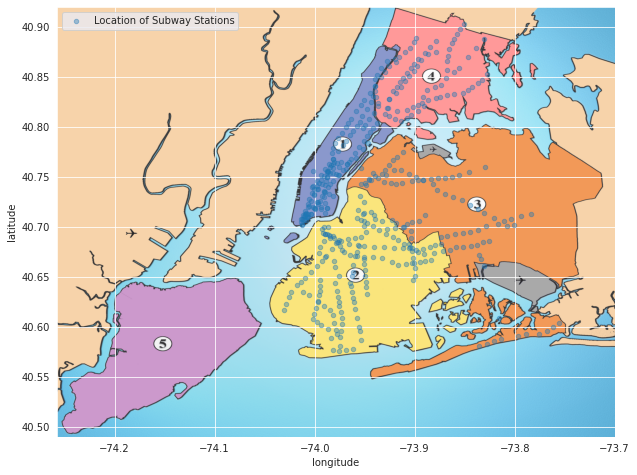

In [0]:
def lot(row):
  text = row["the_geom"]
  n = 1
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(' ')
  groups2[1] = groups2[1][:-1]
  groups2 = [float(i) for i in groups2] 
  return groups2[0]

def lat(row):
  text = row["the_geom"]
  n = 1
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(' ')
  groups2[1] = groups2[1][:-1]
  groups2 = [float(i) for i in groups2] 
  return groups2[1]


NYC_S["longitude"] = NYC_S.apply(lot, axis=1)
NYC_S["latitude"] = NYC_S.apply(lat, axis=1)


data_plot6 = NYC_S

#initializing the figure size
plt.figure(figsize=(10,8))

#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/a/a7/5_Boroughs_New_York_City_Ma.png')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

#using scatterplot again
data_plot6.plot(kind='scatter', x='longitude', y='latitude',  ax=ax,  alpha=0.4, zorder=5, legend=True)
ax.legend(["Location of Subway Stations"])
plt.show()

### NYC Neighbourhood Map

For the machine learning part of the project, we will need to separate new york city into its neighborhood and tell which neighborhood a particular point belongs to. To do, this we will utilize the following data where the boundaries of neighbourhoods are determined by polygon objects.

In [0]:
ny_shape_df = gpd.read_file(join(path_prefix, "ZillowNeighborhoods-NY.shp"))  
ny_shape_df.head(5)

State   County  ... RegionID                                           geometry
0    NY  Suffolk  ...     3736  POLYGON ((-73.14423 40.78667, -73.14402 40.785...
1    NY   Albany  ...     6687  POLYGON ((-73.82263 42.50203, -73.82181 42.501...
2    NY   Queens  ...     6719  POLYGON ((-73.85630 40.72303, -73.85654 40.722...
3    NY  Suffolk  ...     6912  POLYGON ((-73.18891 40.63929, -73.18889 40.639...
4    NY   Albany  ...     9545  POLYGON ((-73.87198 42.69916, -73.86125 42.695...

[5 rows x 6 columns]

In [0]:
type(ny_shape_df.iloc[3]["geometry"])

shapely.geometry.polygon.Polygon

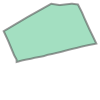

In [0]:
ny_shape_df.iloc[3]["geometry"]

In this data, the column 'geometry' includes the shape of each neighborhood as python object called polygon. The other columns are self-explanatory, except for the column "Name" which gives the name of neighborhood. But, there is redundant part of the data since it also includes neighborhoods from other cities than New York city. To solve this we have the following line of code.

In [0]:
ny_shape_df = ny_shape_df[ny_shape_df["City"]=="New York"]

One essential property we will use is a function named contains for these type of object in python.

In [0]:
from shapely.geometry import Polygon, Point

pt = Point(-73.9892143340222, 40.75926091219353)  #point object

ny_shape_df[ny_shape_df["geometry"].contains(pt)]              #to check which neighbourhood contains it

State    County  ... RegionID                                           geometry
327    NY  New York  ...   273289  POLYGON ((-74.00148 40.76816, -73.99840 40.766...

[1 rows x 6 columns]

Another issue we need to scrutinize is whether the name of neighborhoods in our main data complies with the names in the data above. There might be some changes in the punctuation, or space, etc. To check this, we can look at which neighborhood names are not contained in the data above.

In [0]:
ngh_list = np.array(ny_shape_df.Name.unique())

df[np.isin(df["neighbourhood"], ngh_list) !=1].neighbourhood.unique()

array(['Bedford-Stuyvesant', "Hell's Kitchen", 'South Slope',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'Highbridge', 'Ditmars Steinway', 'Two Bridges', 'Nolita',
       'Allerton', 'Theater District', 'Concourse Village',
       'Cypress Hills', 'Columbia St', 'Battery Park City',
       'Civic Center', 'Mariners Harbor', 'Concord', 'Downtown Brooklyn',
       'Mount Eden', 'Bronxdale', 'Sea Gate', 'Claremont Village',
       'Bayswater', 'Mount Hope', 'East Morrisania', 'Throgs Neck',
       'Morrisania', 'Edgemere', 'Richmondtown', 'Howland Hook',
       'Schuylerville', 'Douglaston', 'Olinville', 'Edenwald',
       'Bay Terrace, Staten Island', 'Westchester Square', 'Little Neck',
       "Bull's Head"], dtype=object)

As we can see, there are such neighborhood names. These can be traced back to differences in convention for giving the names. To resolve this, we will rename these using our NYC neighborhood map.

In [0]:
def nghObtain(x):
  return ny_shape_df[ny_shape_df["geometry"].contains(Point(x["longitude"], x["latitude"]))]["Name"]

df.loc[np.isin(df["neighbourhood"], ngh_list) !=1, "neighbourhood"] =  df[np.isin(df["neighbourhood"], ngh_list) !=1].apply(nghObtain, axis=1)

df[np.isin(df["neighbourhood"], ngh_list) !=1].neighbourhood.unique()

array([nan], dtype=object)

## Machine Learning Models

Since our additinal datasets does not include neighborhood information, we will extract this information in feature engineering section. In the end of this section, number of theatre, subway, university/college, restaurant in a neighborhood will be added to our main dataset as new features. 

#### Feature Engineering for ML algorithms

But, there is still one issue. There is no point object in our supplementary data so that we can extract its neighborhood and add it to our main data. Although we have the columns name "the_geom", they are not points objects, but rather strings.

In [0]:
type(NYC_TH.iloc[3]["the_geom"])

str

We will extract its point objects and obtain the corresponding neighborhood by using these point objects and NYC neighborhood map data. To accomplish this, we have the following lines of code. The similar processes will be applied to other supplementary data.

In [0]:
def pointObj(x):
  #function for obtaining longitude, latitude
  text = x["the_geom"]
  n = 1
  groups1 = text.split('(')
  l1 = '('.join(groups1[:n]), '('.join(groups1[n:])

  groups2 = l1[1].split(' ')
  groups2[1] = groups2[1][:-1]
  groups2 = [float(i) for i in groups2] 
  return Point(groups2[0], groups2[1])


NYC_TH["point"] = NYC_TH.apply(pointObj, axis=1)

NYC_TH.head(3)

the_geom  ...                                         point
0  POINT (-73.99061840882582 40.75985115447559)  ...  POINT (-73.99061840882582 40.75985115447559)
1   POINT (-73.9881059525377 40.76047123447081)  ...  POINT (-73.98810595253769 40.76047123447081)
2  POINT (-73.97038450260143 40.76339942774153)  ...  POINT (-73.97038450260143 40.76339942774153)

[3 rows x 11 columns]

In [0]:
def nghObtain(x):
  return ny_shape_df[ny_shape_df["geometry"].contains(x)]["Name"].values[0]

NYC_TH["neighbourhood"] =  NYC_TH["point"].apply(nghObtain)
NYC_TH.head(3)

the_geom  ...    neighbourhood
0  POINT (-73.99061840882582 40.75985115447559)  ...          Clinton
1   POINT (-73.9881059525377 40.76047123447081)  ...          Clinton
2  POINT (-73.97038450260143 40.76339942774153)  ...  Upper East Side

[3 rows x 12 columns]

In [0]:
#the same for university and college data
UC["point"] = UC.apply(pointObj, axis=1)
UC["neighbourhood"] =  UC["point"].apply(nghObtain)
UC.head(3)

the_geom  ...      neighbourhood
0   POINT (-73.99465215457163 40.73519616365903)  ...  Greenwich Village
1   POINT (-73.99706966379965 40.73546280987431)  ...  Greenwich Village
2  POINT (-74.00681944352681 40.723441859057495)  ...            Tribeca

[3 rows x 13 columns]

In [0]:
#we have a different setting for the restaurant data

def rPoint(row):
  return Point(float(row["Longitude"]), float(row["Latitude"]))

r["point"] = r.apply(rPoint, axis=1)
r["neighbourhood"] =  r["point"].apply(nghObtain)

r.head(3)

CAMIS  ...           neighbourhood
0  50019198  ...  Douglaston-Little Neck
2  50015826  ...                 Astoria
4  41701282  ...              Pelham Bay

[3 rows x 28 columns]

In [0]:
#the same for subway data
NYC_S["point"] = NYC_S.apply(pointObj, axis=1)
NYC_S["neighbourhood"] =  NYC_S["point"].apply(nghObtain)


NYC_S.head(3)


URL  ...      neighbourhood
0  http://web.mta.info/nyct/service/  ...  Greenwich Village
1  http://web.mta.info/nyct/service/  ...          Chinatown
2  http://web.mta.info/nyct/service/  ...            Midtown

[3 rows x 10 columns]

- Let's add the number of theatre, restaurant etc. in a neighborhood to our main data. This will give us an idea of how many of these elements exist around the house of interest. We will start with theatre data and continue the same way for the others.

In [0]:
valSeries_TH = NYC_TH["neighbourhood"].value_counts()

print(valSeries_TH)

Midtown                         42
Clinton                         15
East Village                     9
West Village                     7
SoHo                             5
Flatiron District                5
NoHo                             5
Upper West Side                  4
Tribeca                          3
Garment District                 3
Greenwich Village                3
Chelsea                          2
Upper East Side                  2
Lower East Side                  2
Central Park                     2
Sutton Place                     1
Financial District               1
Columbus Circle                  1
Hunters Point                    1
Gramercy                         1
Flushing Meadows Corona Park     1
Harlem                           1
Morningside Heights              1
Name: neighbourhood, dtype: int64


In [0]:
def theatreNum(x):
  #in our main data there are some neighborhoods that don't have theatre 
  #nor corresponding neighborhod name in the series above. To resolve this, we check if it is in
  if x in valSeries_TH:
    return valSeries_TH[x]
  else:
    return 0

df["theatre"] = df["neighbourhood"].apply(theatreNum)

df.head(3)

name  host_id  ... availability_365 theatre
0   Clean & quiet apt home by the park     2787  ...              365       0
1                Skylit Midtown Castle     2845  ...              355      42
2  THE VILLAGE OF HARLEM....NEW YORK !     4632  ...              365       1

[3 rows x 15 columns]

In [0]:
valSeries_UC = UC["neighbourhood"].value_counts()

def ucNum(x):
  if x in valSeries_UC:
    return valSeries_UC[x]
  else:
    return 0

df["UC"] = df["neighbourhood"].apply(ucNum)

df.head(3)

name  host_id  ... theatre UC
0   Clean & quiet apt home by the park     2787  ...       0  0
1                Skylit Midtown Castle     2845  ...      42  1
2  THE VILLAGE OF HARLEM....NEW YORK !     4632  ...       1  1

[3 rows x 16 columns]

In [0]:
valSeries_r = r["neighbourhood"].value_counts()

def rNum(x):
  if x in valSeries_r:
    return valSeries_r[x]
  else:
    return 0

df["restaurant"] = df["neighbourhood"].apply(rNum)

df.head(3)

name  host_id  ... UC restaurant
0   Clean & quiet apt home by the park     2787  ...  0          4
1                Skylit Midtown Castle     2845  ...  1         33
2  THE VILLAGE OF HARLEM....NEW YORK !     4632  ...  1         19

[3 rows x 17 columns]

In [0]:
valSeries_S = NYC_S["neighbourhood"].value_counts()

def swNum(x):
  if x in valSeries_S:
    return valSeries_S[x]
  else:
    return 0

df["subway"] = df["neighbourhood"].apply(swNum)

df.head(3)

name  host_id  ... restaurant subway
0   Clean & quiet apt home by the park     2787  ...          4      3
1                Skylit Midtown Castle     2845  ...         33     11
2  THE VILLAGE OF HARLEM....NEW YORK !     4632  ...         19     11

[3 rows x 18 columns]

**Summary of the Section:** Now, at the end we contained the number of relevant elements, e.g. restaurant, in a neighborhood. This is accomplished by using NYC map data which includes polygon objects and creating columns for the relevant elements. Those information can be seen in the code right above. This way, we will be able to treat neighborhoods as data point with coordinates being the number of those elements. The classes of these data points are the neighborhood group in which those neighborhoods are located. Hence, we prepared an appropriate setting for, for instance, kNN. Next, we will implement the ML algorithms.
- Remark: At first, we did add the number of theatres, subways etc in a neighborhood group. This was not a reasonable step to take because this way, we are not adding a variable continuos enough. In other words, all "Manhattan" points will have the same number, this will not contribute to performance of models. So we realized our fault and remake our calculations based on neighborhoods. 
- In the image representations below, left image represents the case when we add number of theater, subway etc in a neighborhood group whereas right image represents the case when we add them into neighborhoods.(data points in the images are not related with our real data, they are just examples). As you can see, right one will be the right form for applying kNN algorithm. 

![alt text](https://drive.google.com/uc?id=18kdXn_R46t8npsEfREPlXjnGUmSI3itv)

### Predicting the Borough (Neighborhood group)
This borough classification will help a possible client while making desicions about where to stay. When client gives the desired properties, our model will predict the neighborhood mostly satifying these properties. 

#### k-Nearest Neighbors
Let's apply kNN to predict borough using different feature sets.


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# they are placed in the order of increasing contribution of supplementary data

X1 = df[["price","number_of_reviews", "minimum_nights", "availability_365"]]
X2 = df[["price","number_of_reviews", "availability_365", "minimum_nights", "restaurant"]]
X3 = df[["price","number_of_reviews", "UC", "restaurant", "subway"]]
X4 = df[["price","number_of_reviews", "theatre", "UC", "restaurant", "subway"]]
y = df["neighbourhood_group"]


y = df["neighbourhood_group"]

feature_set_list = [X1, X2, X3, X4]

b=1
for f in feature_set_list:
  X_train, X_remaining, y_train, y_remaining = train_test_split(f, y, test_size=0.20, random_state=0)
  k=14
  # generate the model
  model = KNeighborsClassifier(k, metric="manhattan")

  model.fit(X_train, y_train)

  y_pred1 = model.predict(X_remaining)
  print("Accuracy score of kNN with k=14, feature X" + str(b) + " and metric Manhattan: ", accuracy_score(y_remaining, y_pred1))
  b+=1


Accuracy score of kNN with k=14, feature X1 and metric Manhattan:  0.5303200736271603
Accuracy score of kNN with k=14, feature X2 and metric Manhattan:  0.6427037529399734
Accuracy score of kNN with k=14, feature X3 and metric Manhattan:  0.7730851825340014
Accuracy score of kNN with k=14, feature X4 and metric Manhattan:  0.8034563861335515


In the prediction above, we just give random k and metric values. In the 
section below, we tried to find out which metric, hyperparameter k, and feature set give the higher accuracy. Also, we see that feature set 4 gives the highest accuracy. Hence, we proceed with it.

Hyperparameter tuning:

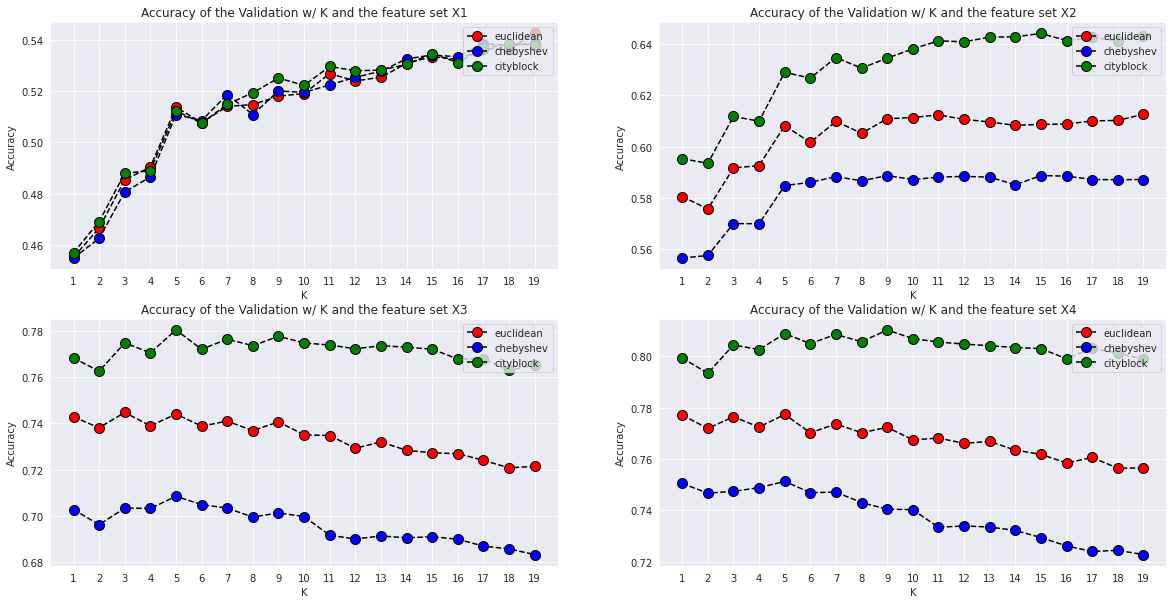

In [0]:
K_range = np.arange(1, 20)
accuracy_matrix = []
dist_list = ["euclidean", "chebyshev", "cityblock"]
color_list = ["red", "blue", "green"]

fig, axs = plt.subplots(2, 2, figsize=(20,10))

for l in range(4):
  accuracy_list = [[],[],[]]
  for i in range(3):
    for k in K_range:
      X_train, X_remaining, y_train, y_remaining = train_test_split(feature_set_list[l], y, test_size=0.20, random_state=0)
      # create a new model with current K
      knn = KNeighborsClassifier(k, metric=dist_list[i])
      # fit training data
      knn.fit(X_train, y_train)
      # predict the validation data
      y_pred = knn.predict(X_remaining)
      # obtain the accuracy value
      accuracy = accuracy_score(y_remaining, y_pred)
      accuracy_list[i].append(accuracy)
    axs[l//2, l%2].plot(K_range, accuracy_list[i], color='black', linestyle='dashed', marker='o', markerfacecolor=color_list[i], 
              markersize=10, label=dist_list[i])
    axs[l//2, l%2].legend(loc="upper right")
  axs[l//2, l%2].set_title('Accuracy of the Validation w/ K and the feature set X' + str(l+1))
  axs[l//2, l%2].set_xlabel('K')
  axs[l//2, l%2].set_ylabel('Accuracy')
  axs[l//2, l%2].set_xticks(K_range)
  accuracy_matrix.append(accuracy_list)



  plt.grid()
plt.show()


Therefore, we should pick the feature set X4, with metric manhattan and k=9. Note that we didn't look the results beyond k=20. Even though there might a little amount of increase of the accuracy for $k>20$, it is not advantageous since the process of fitting will require more time, decreasing the efficiency of obtaining prediction. The same reasoning applies for the other kNN algorithm below.
We also apply kNN to feature set X1, the one with no additional features. As we see in the graphic above, we should take 18 and metric manhattan to reach best accuracy for thit model. 

In [0]:
#feature set without additional data

X1_train, X1_remaining, y1_train, y1_remaining = train_test_split(X1, y, test_size=0.20, random_state=0)
model1 = KNeighborsClassifier(18, metric="manhattan")
model1.fit(X1_train, y1_train)
y_pred1 = model1.predict(X1_remaining)
accuracy_ngh_knn=accuracy_score(y1_remaining, y_pred1)
print("Accuracy score : ", accuracy_ngh_knn)

Accuracy score :  0.5381940893751918


In [0]:
#feature set with additional data

X4_train, X4_remaining, y4_train, y4_remaining = train_test_split(X4, y, test_size=0.20, random_state=0)
model2 = KNeighborsClassifier(9, metric="manhattan")
model2.fit(X4_train, y4_train)
y_pred2 = model2.predict(X4_remaining)
accuracy_ngh_knn_s = accuracy_score(y4_remaining, y_pred2)
print("Accuracy score : ", accuracy_ngh_knn_s)

Accuracy score :  0.8103078024337866


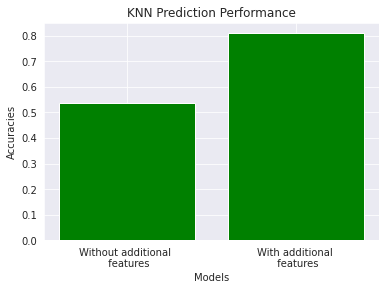

In [0]:
data = {'Without additional \n features':accuracy_ngh_knn, 'With additional \n features':accuracy_ngh_knn_s}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("KNN Prediction Performance")


plt.show()

As we see in the comparison graphic above, even the best performing kNN model with unmodified feature set has a very low accuracy compared to the model with modified feature set. We conclude that adding new features, combined with hyperparameter tuning provides higher accuracy values in kNN algorithm. 

#### Decision Tree
This time we will analyze the performance of decision tree model, with additional and without additional features. 

In [0]:
from sklearn import tree

model_decision_tree1 = tree.DecisionTreeClassifier()
model_decision_tree1.fit(X1_train, y1_train)
y_pred_dt_remaining1=model_decision_tree1.predict(X1_remaining)
accuracy_ngh_dt= accuracy_score(y1_remaining, y_pred_dt_remaining1)
print(accuracy_ngh_dt)

0.4652827487473157


In [0]:
model_decision_tree2 = tree.DecisionTreeClassifier()
model_decision_tree2.fit(X4_train, y4_train)

y_pred_dt = model_decision_tree2.predict(X4_train)
y_pred_dt_remaining=model_decision_tree2.predict(X4_remaining)
model2_train= accuracy_score(y4_train, y_pred_dt)
accuracy_ngh_dt_s= accuracy_score(y4_remaining, y_pred_dt_remaining)
print(accuracy_ngh_dt_s)

0.8813784640556294


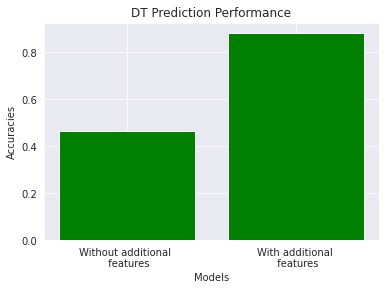

In [0]:
data = {'Without additional \n features':accuracy_ngh_dt, 'With additional \n features':accuracy_ngh_dt_s}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("DT Prediction Performance")
plt.xticks()

plt.show()

We see that additional features has an increasing effect on accuracy.

Here, accuracy is %88, this does not seem like overfitting but just to make sure, we will try to adjust some hyperparameters like min_samples_leaf and max_depth. We limit the number of samples that one node can possess to 5 and the growth of tree to depth 2. And also we are going go look at accuracy on test and train separetly. 

In [0]:
model_0_decision_tree = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=2)
model_0_decision_tree.fit(X1_train, y1_train)

y_pred0_dt = model_0_decision_tree.predict(X1_train)
y_pred0_dt_remaining=model_0_decision_tree.predict(X1_remaining)
model0_train=accuracy_score(y1_train, y_pred0_dt)
model0_test=accuracy_score(y1_remaining, y_pred0_dt_remaining)


model_3_decision_tree = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=2)
model_3_decision_tree.fit(X4_train, y4_train)

y_pred3_dt = model_3_decision_tree.predict(X4_train)
y_pred3_dt_remaining=model_3_decision_tree.predict(X4_remaining)
model3_train=accuracy_score(y4_train, y_pred3_dt)
model3_test=accuracy_score(y4_remaining, y_pred3_dt_remaining)

Text(0.5, 0, 'accuracy')

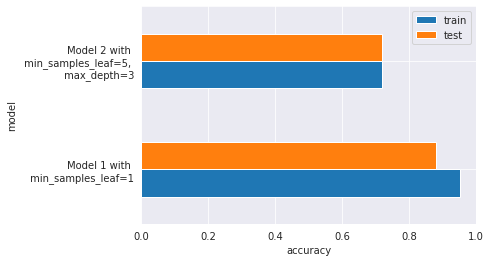

In [0]:

train = [model2_train, model3_train]
test = [accuracy_ngh_dt_s, model3_test]
index = ["Model 1 with \n min_samples_leaf=1", "Model 2 with \n min_samples_leaf=5, \n max_depth=3"]
df_n = pd.DataFrame({'train': train,'test': test}, index=index)
ax = df_n.plot.barh()
ax.set_ylabel('model')
ax.set_xlabel('accuracy')



We see that our model 1 gives less accuracy on test data, but it still has good accuracy and there is not a significant difference between performance on train and tes. So, we cannot say model 1 is overfitted. But if one want to take extra precautions then model 2 can be a choice as well. 

#### Random Forest

Let's try random forest on old features and new features. 

In [0]:
model_rf_o = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf_o.fit(X1_train, y1_train)

rf_predictions_0 = model_rf_o.predict(X1_remaining)
accuracy_ngh_rf=accuracy_score(y1_remaining, rf_predictions_0)
print("Accuracy score of random forest:", accuracy_ngh_rf)

Accuracy score of random forest: 0.5213211984865528


In [0]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X4_train, y4_train)

rf_predictions = model_rf.predict(X4_remaining)
accuracy_ngh_rf_s=accuracy_score(y4_remaining, rf_predictions)
print("Accuracy score of random forest:", accuracy_ngh_rf_s)

Accuracy score of random forest: 0.8844462623990184


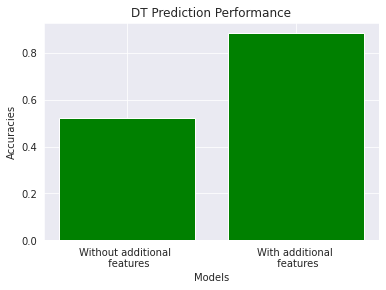

In [0]:
data = {'Without additional \n features':accuracy_ngh_rf, 'With additional \n features':accuracy_ngh_rf_s}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("DT Prediction Performance")
plt.xticks()

plt.show()

We see that additional features has an increasing effect on accuracy.

Again, we cannot say that it is overfitted. But just to see the impact of hyperparameters, let's try some hyperparameter tuning here:

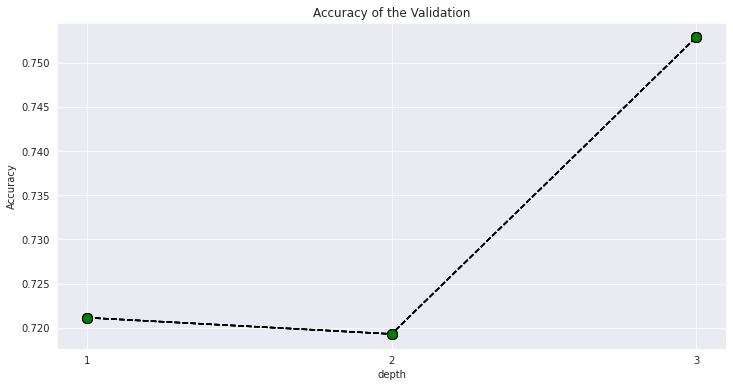

In [0]:
depth_range = np.arange(1, 4)
samples_leaf_range=np.arange(2,6)
accuracy_list = [[],[],[],[]]
color_list = ["red", "blue", "purple", "green"]


plt.figure(figsize=(12, 6))
plt.title('Accuracy of the Validation' )
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)

for k in samples_leaf_range:
  for i in depth_range:
    # create a new model with current K
    model =RandomForestClassifier(n_estimators=50, random_state=0, max_depth=i, min_samples_leaf=k )
    # fit training data
    model.fit(X4_train, y4_train)
    # predict the validation data
    y_pred = model.predict(X4_remaining)
    # obtain the accuracy value
    accuracy = accuracy_score(y4_remaining, y_pred)
    accuracy_list[k-2].append(accuracy)
  plt.plot(depth_range, accuracy_list[k-2], color='black', linestyle='dashed', marker='o', markerfacecolor=color_list[k-2], markersize=10)

We see that min sample leaf adjustment has no effect on the accuracy, interestingly. Max depth restriction decreases the accuracy, we see on the graph that accuracies are approximately 0.7(lower than the value with default hyperparameter).The reason behind that is, restricting max depth prevents model to grow so much and become complex.As expected, we see that setting max depth to 3 gives slightly higher accuracy.But as we said in the decision tree section, 88% is not that high to be classified as overfitting and that is why we did not use tuned model.  If you want to take extra precautions against overfitting, tuned model will be used. 

#### Overall Evaluation of Prediction for Boroughs

In this section, we implemented 3 different ML algrorithms to predict the boroughs using other features. We observed the effect of the choice of the parameters such as k value, min_sample_leaf etc. From these, we selected the model with highest accuracy. In addition, we tried to observe the effect of supplementary data on the accuracy of ML models. We saw that they increase the accuracy by a significant amount. One reason for this is that we were able to classify the supplementary data on the neighborhood level. Having done all these, we realized that the most accurate models are decision tree and random forest with X4 feautre set, accuracy $\approx 0.81$, which indicates no risk of overfitting. All these numerical results are visually summarized below.

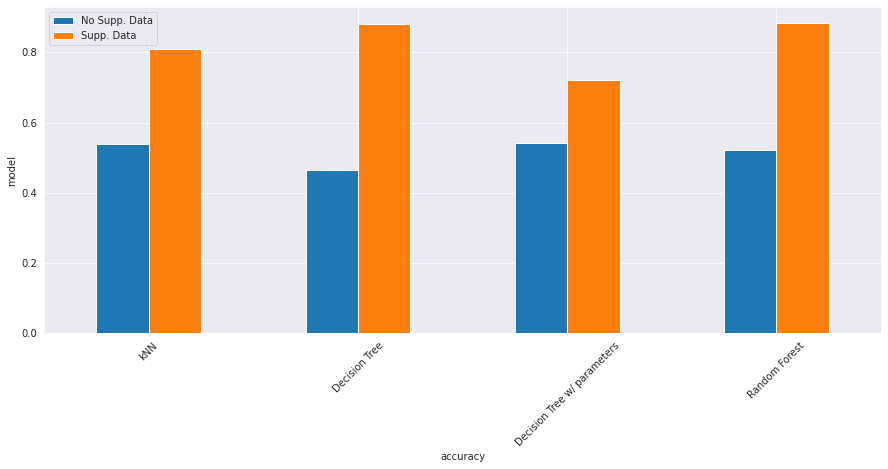

In [0]:
data = {'kNN': [accuracy_ngh_knn, accuracy_ngh_knn_s], 'Decision Tree': [accuracy_ngh_dt, accuracy_ngh_dt_s], 'Decision Tree w/ parameters': [model0_test, model3_test], 'Random Forest': [accuracy_ngh_rf, accuracy_ngh_rf_s]}

names = []
values = []

names.append(list(data.keys()))
values= np.array(list(data.values()))


index = names[0]
df_n = pd.DataFrame.from_dict(data, orient='index')
ax = df_n.plot.bar(figsize=(15,6))
ax.set_ylabel('model')
ax.set_xlabel('accuracy')
ax.set_xticklabels(names[0], rotation=45)
ax.legend(["No Supp. Data", "Supp. Data"])


### Prediction for Price using ML Algorithms

Price prediction will be important for a client looking for a rent. If client provides the neighbordood, room type, availability etc, our model will give a price interval that s/he will possibly find out. Price prediction is also important for a host because before buying a house or room to rent, features of this property will give an approximate price. Therefore, the host will know the price market of that kind of Airbnb's, so s/he won't prefer to set a rent too high or too low. 

####Regression with Other Algorithms


Since we want to predict price which is a continuous variable, we use regressor. 

Let's try first with original airbnb data, without additional features that we have added. 

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
Xp = df[[ "number_of_reviews", "minimum_nights", "availability_365",  "latitude", "longitude"]]
Xp1 = df[["number_of_reviews","minimum_nights", "availability_365", "theatre", "UC", "restaurant", "subway",  "latitude", "longitude"]]
Xp_list = [Xp, Xp1]
yp = df["price"]

tList = ["--------The Regression Results Using Only the Main Data---------- \n", "\n \n --------The Regression Results Using Supplementary Data---------- \n" ]


for i in range(2):
  print(tList[i])
  Xp_train, Xp_remaining, yp_train, yp_remaining = train_test_split(Xp_list[i], yp, test_size=0.20, random_state=0)
  k=8
  # import models
  knn = KNeighborsRegressor(k)
  dt = DecisionTreeRegressor()
  rf = RandomForestRegressor(n_estimators=100)

  # train as usual
  knn.fit(Xp_train, yp_train)
  dt.fit(Xp_train, yp_train)
  rf.fit(Xp_train, yp_train)

  y_pred_rf = rf.predict(Xp_remaining)
  y_pred_dt= dt.predict(Xp_remaining)
  y_pred_knn=knn.predict(Xp_remaining)

  mse_rf = mean_squared_error(yp_remaining, y_pred_rf)
  mae_rf = mean_absolute_error(yp_remaining, y_pred_rf)
  rmse_rf = np.sqrt(mse_rf)

  print ("RANDOM FOREST:")
  print("mse: {}".format(mse_rf))
  print("mae: {}".format(mae_rf))
  print("rmse: {}".format(rmse_rf))

  mse_dt = mean_squared_error(yp_remaining, y_pred_dt)
  mae_dt = mean_absolute_error(yp_remaining, y_pred_dt)
  rmse_dt = np.sqrt(mse_dt)

  print ("DECISION TREE:")
  print("mse: {}".format(mse_dt))
  print("mae: {}".format(mae_dt))
  print("rmse: {}".format(rmse_dt))



  mse_knn = mean_squared_error(yp_remaining, y_pred_knn)
  mae_knn = mean_absolute_error(yp_remaining, y_pred_knn)
  rmse_knn = np.sqrt(mse_knn)

  print ("KNN:")
  print("mse: {}".format(mse_knn))
  print("mae: {}".format(mae_knn))
  print("rmse: {}".format(rmse_knn))

--------The Regression Results Using Only the Main Data---------- 

RANDOM FOREST:
mse: 10412.063286409653
mae: 63.028356682687395
rmse: 102.0395182584162
DECISION TREE:
mse: 20402.848143982003
mae: 85.39830248491666
rmse: 142.83853872110987
KNN:
mse: 14183.79186905614
mae: 77.43652213927804
rmse: 119.09572565401388

 
 --------The Regression Results Using Supplementary Data---------- 

RANDOM FOREST:
mse: 10374.88233152674
mae: 62.76365272522753
rmse: 101.85716632386128
DECISION TREE:
mse: 20048.37335105839
mae: 84.34614991307905
rmse: 141.59227857146163
KNN:
mse: 12935.665212125474
mae: 72.32525053686471
rmse: 113.73506588614381


Below, we see comparison of two results obtained above.

| MODEL TYPE    | MAE     | MSE       | RMSE    |
|---------------|---------|-----------|---------|
| RANDOM FOREST | 63.028  | 10412.063  | 102.039  |
| DECISION TREE | 85.398   | 20402.848 | 142.838 |
| KNN           | 77.436  | 14183.791 | 119.095 |

What is important for us is MAE, mean absolute error. This value states that our price prediction will be +-mae. For example if actual data is 100, our random forest model will predict a price in the range (100-63.028, 100+63.028). Since our prices values are in the order of 100 mostly, this prediction is bad. 






---
---
---





| MODEL TYPE    | MAE     | MSE       | RMSE    |
|---------------|---------|-----------|---------|
| RANDOM FOREST | 62.763 | 10374.882 | 101.857  |
| DECISION TREE | 84.346  | 20048.373 | 141.592 |
| KNN           | 72.325  | 12935.665 | 113.735 |

With this updated feature list, we reduced MAE of random forest model from 63 to 62, this is not a significant improvement in terms of predicting the price in contrast to the prediction of the neighborhood group. The reason for this might be that our data has no obvious pattern or trend so that it leads to a particular numerical distribution for the price.

### Prediction for Room Type
Prediction for room type again can be useful for a client and a host. A client may want to know what room type choice is logical with desired neighborhood, price, min nights etc. A host may also use room type prediction, when s/he wants to purchase an airbnb rent, s/he will provide the desired features and model will give the room type fitting into those profile. For example, if most airbnb rents price for a shared room is approximately 50, and if host wants to rent this place for a price 100+, model will recommend private room kind of rental, not shared room. 

#### k-Nearest Neigborhood

Let's first try with original airbnb data set. 

In [0]:
Xr = df[["number_of_reviews", "minimum_nights", "availability_365",  "latitude", "longitude"]]
yr = df["room_type"]

Xr_train, Xr_remaining, yr_train, yr_remaining = train_test_split(Xr, yr, test_size=0.20, random_state=0)

Xr1 = df[[ "number_of_reviews", "minimum_nights", "availability_365", "latitude", "longitude", "price", "restaurant", "theatre", "UC", "subway"]]
yr1 = df["room_type"]

Xr_train1, Xr_remaining1, yr_train1, yr_remaining1 = train_test_split(Xr1, yr1, test_size=0.20, random_state=0)

HYPERMARAMETER TUNING:

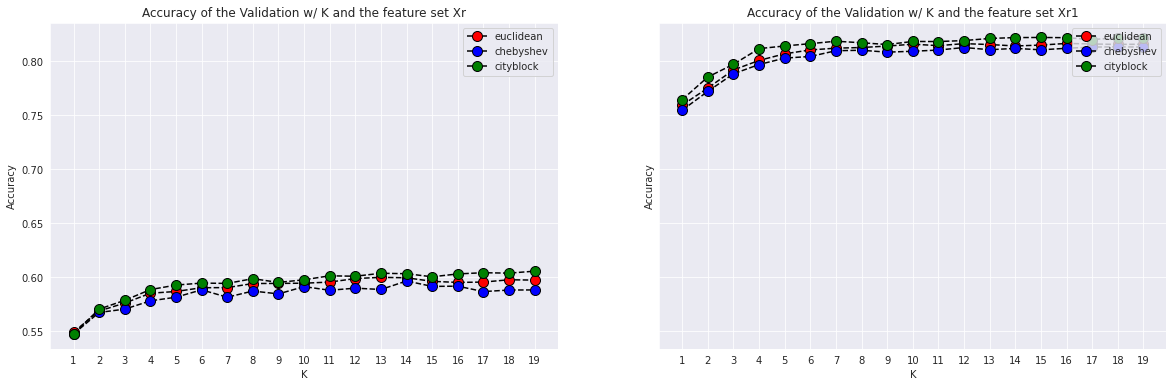

In [0]:
K_range = np.arange(1, 20)
accuracy_matrix = []
dist_list = ["euclidean", "chebyshev", "cityblock"]
color_list = ["red", "blue", "green"]
feature_set_list = [Xr, Xr1]
strList = ["", "1"]
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,6))

for l in range(2):
  accuracy_list = [[],[],[]]
  for i in range(3):
    for k in K_range:
      X_train, X_remaining, y_train, y_remaining = train_test_split(feature_set_list[l], yr, test_size=0.20, random_state=0)
      # create a new model with current K
      knn = KNeighborsClassifier(k, metric=dist_list[i])
      # fit training data
      knn.fit(X_train, y_train)
      # predict the validation data
      y_pred = knn.predict(X_remaining)
      # obtain the accuracy value
      accuracy = accuracy_score(y_remaining, y_pred)
      accuracy_list[i].append(accuracy)
    axs[l].plot(K_range, accuracy_list[i], color='black', linestyle='dashed', marker='o', markerfacecolor=color_list[i], 
              markersize=10, label=dist_list[i])
    axs[l].legend(loc="upper right")
  axs[l].set_title('Accuracy of the Validation w/ K and the feature set Xr' + strList[l])
  axs[l].set_xlabel('K')
  axs[l].set_ylabel('Accuracy')
  axs[l].set_xticks(K_range)
  accuracy_matrix.append(accuracy_list)



  plt.grid()
plt.show()

In this plot, the main data with and without supplementary data is represented by Xr and Xr1, respectively. We see that the best accuracy comes from Manhattan with k=18.

In [0]:
model4r = KNeighborsClassifier(18, metric="manhattan")

model4r.fit(Xr_train, yr_train)

yr_pred4 = model4r.predict(Xr_remaining)
accuracy_room_knn = accuracy_score(yr_remaining, yr_pred4)
print(accuracy_room_knn)

0.6038449739237141


Let's try kNN with additional features. 

In [0]:
Xr1 = df[[ "number_of_reviews", "minimum_nights", "availability_365", "latitude", "longitude", "price", "restaurant", "theatre", "UC", "subway"]]
yr1 = df["room_type"]

Xr_train1, Xr_remaining1, yr_train1, yr_remaining1 = train_test_split(Xr1, yr1, test_size=0.20, random_state=0)


model4r = KNeighborsClassifier(18, metric="manhattan")

model4r.fit(Xr_train1, yr_train1)

yr_pred41 = model4r.predict(Xr_remaining1)
accuracy_room_knn_s=accuracy_score(yr_remaining1, yr_pred41)
print("Accuracy of KNN model:", accuracy_room_knn_s)

Accuracy of KNN model: 0.8218631761938848


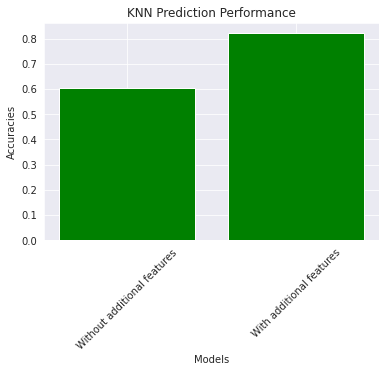

In [0]:
data = {'Without additional features':accuracy_room_knn, 'With additional features':accuracy_room_knn_s}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("KNN Prediction Performance")
plt.xticks( rotation=45)

plt.show()

We see that additional features increases the performance very well. 

#### Decision Tree

Whereas Desicion tree model of the old data give an accuracy of 0.60, it gives the accuracy 78% on test data with newly added features. This is not as high as an overfitted model hence we do not do hyperparameter adjustments here. 

In [0]:
model_r1 = tree.DecisionTreeClassifier()
model_r1.fit(Xr_train, yr_train)
y_pred51 = model_r1.predict(Xr_remaining)

accuracy_room_dt = accuracy_score(yr_remaining, y_pred51)

model_r = tree.DecisionTreeClassifier()
model_r.fit(Xr_train1, yr_train1)
y_pred_dt = model_r.predict(Xr_remaining1)

accuracy_room_dt_s = accuracy_score(yr_remaining1, y_pred_dt)


print(accuracy_room_dt, accuracy_room_dt_s)

0.6023110747520196 0.7775846201043052


We suspected that there might an overfitting in our model with additional data and plotted the following plot. There, we compared models with hyperparameter and without hyperparameters, max dept. The plot confirmed our results in that in model_1 there is a significant difference between the accuracies for test and train data. Since the tuned model_2 has no such difference, we decided to continue with model_2.

Text(0.5, 0, 'accuracy')

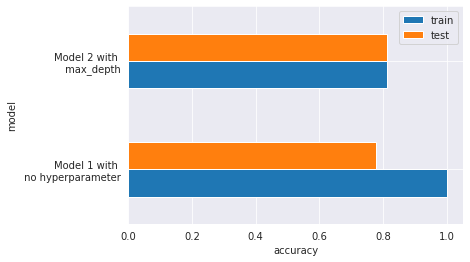

In [0]:
model_r = tree.DecisionTreeClassifier()
model_r.fit(Xr_train1, yr_train1)
y_pred_dt = model_r.predict(Xr_remaining1)

accuracy_room_dt_s = accuracy_score(yr_remaining1, y_pred_dt)

#the version of above with parameters
model_r_prmt = tree.DecisionTreeClassifier(max_depth=3)
model_r_prmt.fit(Xr_train1, yr_train1)
y_pred_dt_prmt = model_r_prmt.predict(Xr_remaining1)

accuracy_room_dt_s_prmt = accuracy_score(yr_remaining1, y_pred_dt_prmt)


y_pred_dt_train = model_r.predict(Xr_train1)

accuracy_room_dt_s_train = accuracy_score(yr_train1, y_pred_dt_train)

#the version of above with parameters


y_pred_dt_prmt_train = model_r_prmt.predict(Xr_train1)

accuracy_room_dt_s_prmt_train = accuracy_score(yr_train1, y_pred_dt_prmt_train)



train = [accuracy_room_dt_s_train, accuracy_room_dt_s_prmt_train]
test = [accuracy_room_dt_s, accuracy_room_dt_s_prmt]
index = ["Model 1 with \n no hyperparameter","Model 2 with \n max_depth=3"]
df_n = pd.DataFrame({'train': train,'test': test}, index=index)
ax = df_n.plot.barh()
ax.set_ylabel('model')
ax.set_xlabel('accuracy')

([0, 1], <a list of 2 Text major ticklabel objects>)

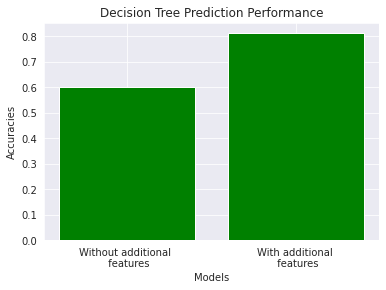

In [0]:
data = {'Without additional \n features':accuracy_room_dt, 'With additional \n features':accuracy_room_dt_s_prmt}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Decision Tree Prediction Performance")
plt.xticks()


Here, we see a similar patter in that the addition of supplementary data increases the accuracy. 

#### Random Forest

Let's do RF model on old feature set and on new one. Accuracy values are not that high to be classified as overfitting. We observe that additional features increased the accuracy. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rf_r = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf_r.fit(Xr_train, yr_train)

rf_predictions_r = model_rf_r.predict(Xr_remaining)
accuracy_room_rf = accuracy_score(yr_remaining, rf_predictions_r)

In [0]:
model_rf_r1 = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3)
model_rf_r1.fit(Xr_train1, yr_train1)

rf_predictions_r1 = model_rf_r1.predict(Xr_remaining1)
accuracy_room_rf_s = accuracy_score(yr_remaining1, rf_predictions_r1)

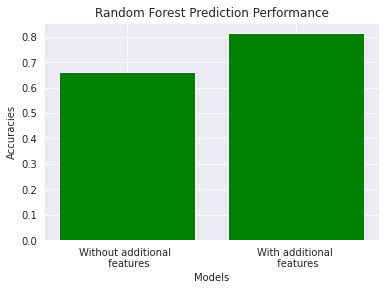

In [0]:
data = {'Without additional \n features':accuracy_room_rf, 'With additional \n features':accuracy_room_rf_s}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Random Forest Prediction Performance")
plt.xticks()

plt.show()

#### Overall Evaluation for Predicting the Room Type

In terms of the comparison between only the main data and the data equipped with supplementary data, we see a similar pattern to the previous examples. It increases the accuracy for all the algorithms. All three ML algorithms give approximately the same accuracy.However, kNN is simpler because it has less hyperparamters hence it necessites less hyperparameter tuning calculations. Therefore, choosing kNN is wiser decision here. 

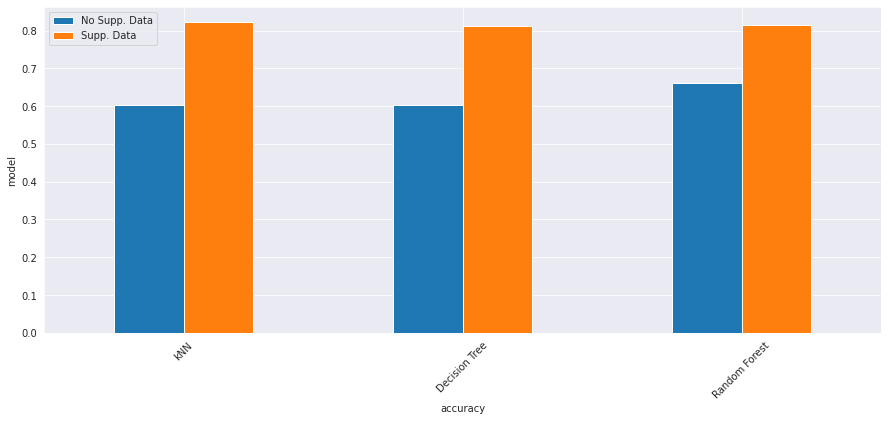

In [0]:
data = {'kNN': [accuracy_room_knn, accuracy_room_knn_s], 'Decision Tree': [accuracy_room_dt, accuracy_room_dt_s_prmt], 'Random Forest': [accuracy_room_rf, accuracy_room_rf_s]}

names = []
values = []

names.append(list(data.keys()))
values= np.array(list(data.values()))


index = names[0]
df_n = pd.DataFrame.from_dict(data, orient='index')
ax = df_n.plot.bar(figsize=(15,6))
ax.set_ylabel('model')
ax.set_xlabel('accuracy')
ax.set_xticklabels(names[0], rotation=45)
ax.legend(["No Supp. Data", "Supp. Data"])


## Conclusion
  We observed that Manhattan is the most popular neighbourhood, followed by Brooklyn. Most rents are private room in all neighborhood groups, and entire room/apartment type of rents have highes price in all neighborhood groups.The region with highest availability is Staten Island. Most reviewed region is Queens.Even though Manhattan is the most popular region, the prices for Manhattan are also higher than other regions. We thought that there might be other agents, causing this high popularity. With additional datasets that we used, we have seen that Manhattan has majority of theaters, universites, restaurant, free-wifi locations, bike routes and subway enterances. Therefore, we concluded that these features are important for Airbnb clients and they are the most probable reasons behind the high popularity of Manhattan.
  In the second part of the project, we added number of theaters, university/college, subwat stations, restaurant in a neighborhood, as additional feature. We implemented machine learning algorithms for predicting the neighborhood group, price and room type. The reasons for these predictions are explained in the corresponding sections. We observed that accuracy values for all ML models(KNN,decision tree, random forest) are increased with newly added features. Hence, we can say that those features really have an effect on the choices of Airbnb rents, as we guessed in first part. Whereas the addition of new data set increased the accuracy of room type and borough prediction, it hardly changed the results for the regression of price. In terms of computational purposes, this is disadvantageous as we increased the complexity of our computation. In the graphics below, performances of each algorithms can be seen. 


> Random forest is the best performing model while predicting neighborhood group.


> All three ML algorithms give accuracies very close to each other for room type prediction.


> Random forest regressor is the best performing model while predicting the price because it gives the least MAE. 

> We realize that the prediction for neighborhood group has more accurarate algorithm. This might be partly because the information such as theatre restaurant number gives more accurate characterization of the locations.


**ADVANTAGES/DISADVANTAGES**

For our data size, we did not come across a major overfitting problem but maybe for bigger data set, our models (without hyperparameter tuning) may cause overfitting.

Our solution was to improve accuracy by adding new features that we think related. Our additional datasets are mostly in form of maps hence we only had latitude longitude, we extracted the neighborhood locations out of it in order to add as features. This solution requires a work load since you need to process additional datasets along with original data. This might be the disadvantegous part of our solution. 

We see that if we only used original data, accuracy values are pretty low. Our solution of adding new features makes our solution advantageous by increasing the accuracy values. 



Text(0.5, 0, 'accuracy')

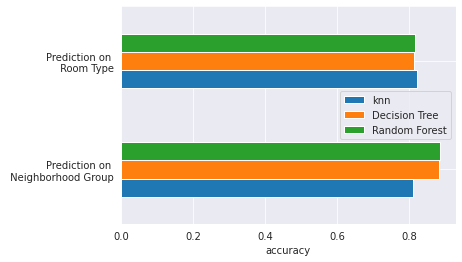

In [0]:
knn = [accuracy_ngh_knn_s, accuracy_room_knn_s]
decision_tree = [accuracy_ngh_dt_s, accuracy_room_dt_s_prmt]
random_forest=[accuracy_ngh_rf_s, accuracy_room_rf_s]
index = ["Prediction on \n Neighborhood Group", "Prediction on \n Room Type"]
df_n = pd.DataFrame({'knn': knn,'Decision Tree': decision_tree, 'Random Forest':random_forest}, index=index)
ax = df_n.plot.barh()

ax.set_xlabel('accuracy')

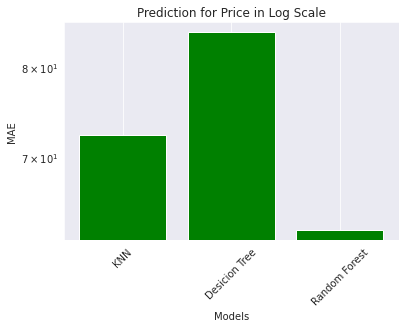

In [0]:
data = {'KNN':mae_knn, 'Desicion Tree':mae_dt , 'Random Forest':mae_rf}
names = list(data.keys())
values = list(data.values())
plt.bar(names, values, color='green')
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Prediction for Price in Log Scale")
plt.xticks(rotation=45)
plt.yscale("log")

plt.show()